# Problem Statement: AllLife Credit Card Customer Segmentation


## Background:

AllLife Bank wants to focus on its credit card customer base in the next financial year. They have been advised by their marketing research team, that the penetration in the market can be improved. Based on this input, the Marketing team proposes to run personalised campaigns to target new customers as well as upsell to existing customers. Another insight from the market research was that the customers perceive the support services of the back poorly. Based on this, the Operations team wants to upgrade the service delivery model, to ensure that customers queries are resolved faster. Head of Marketing and Head of Delivery both decide to reach out to the Data Science team for help.

## Objective: 

To identify different segments in the existing customer based on their spending patterns as well as past interaction with the bank.

## Key Questions:

1. How many different segments of customers are there?
2. How are these segments different from each other?
3. What are your recommendations to the bank on how to better market to and service these customers?

## Data Description:

Data is of various customers of a bank with their credit limit, the total number of credit cards the customer has, and different channels through which customer has contacted the bank for any queries, different channels include visiting the bank, online and through a call centre. 

## Steps to follow:

1. Perform univariate analysis on the data to better understand the variables at your disposal and to get an idea about the no of clusters. Perform EDA, create visualizations to explore data. (10 marks)
2. Properly comment on the codes, provide explanations of the steps taken in the notebook and conclude your insights from the graphs. (5 marks)
3. Execute K-means clustering use elbow plot and analyse clusters using boxplot (10 marks)
4. Execute hierarchical clustering (with different linkages) with the help of dendrogram and cophenetic coeff. Analyse clusters formed using boxplot (15 marks)
5. Calculate average silhouette score for both methods. (5 marks)
6. Compare K-means clusters with Hierarchical clusters. (5 marks)
7. Analysis the clusters formed, tell us how is one cluster different from another and answer all the key questions. (10 marks)

## Import Libraries and Load Dataset

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Numerical libraries
import numpy as np   

from sklearn.cluster import KMeans

# to handle data in form of rows and columns 
import pandas as pd    

# importing ploting libraries
import matplotlib.pyplot as plt   

#importing seaborn for statistical plots
import seaborn as sns

from sklearn import metrics

import pandas as pd

In [3]:
df = pd.read_excel('Credit_Card_Customer_Data.xlsx')
data = df.copy()

In [4]:
data.head()

Sl_No  Customer Key  Avg_Credit_Limit  Total_Credit_Cards  \
0      1         87073            100000                   2   
1      2         38414             50000                   3   
2      3         17341             50000                   7   
3      4         40496             30000                   5   
4      5         47437            100000                   6   

   Total_visits_bank  Total_visits_online  Total_calls_made  
0                  1                    1                 0  
1                  0                   10                 9  
2                  1                    3                 4  
3                  1                    1                 4  
4                  0                   12                 3

In [5]:
data.shape

(660, 7)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660 entries, 0 to 659
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Sl_No                660 non-null    int64
 1   Customer Key         660 non-null    int64
 2   Avg_Credit_Limit     660 non-null    int64
 3   Total_Credit_Cards   660 non-null    int64
 4   Total_visits_bank    660 non-null    int64
 5   Total_visits_online  660 non-null    int64
 6   Total_calls_made     660 non-null    int64
dtypes: int64(7)
memory usage: 36.2 KB


In [7]:
data.drop(['Sl_No', 'Customer Key'], axis=1, inplace=True)

In [8]:
data.describe()

Avg_Credit_Limit  Total_Credit_Cards  Total_visits_bank  \
count        660.000000          660.000000         660.000000   
mean       34574.242424            4.706061           2.403030   
std        37625.487804            2.167835           1.631813   
min         3000.000000            1.000000           0.000000   
25%        10000.000000            3.000000           1.000000   
50%        18000.000000            5.000000           2.000000   
75%        48000.000000            6.000000           4.000000   
max       200000.000000           10.000000           5.000000   

       Total_visits_online  Total_calls_made  
count           660.000000        660.000000  
mean              2.606061          3.583333  
std               2.935724          2.865317  
min               0.000000          0.000000  
25%               1.000000          1.000000  
50%               2.000000          3.000000  
75%               4.000000          5.000000  
max              15.000000         10.000000

In [9]:
# Identifying the duplicate rows
duplicateRowsDF = data[data.duplicated()]
print("Duplicate Rows except first occurrence based on all columns are :")
print(duplicateRowsDF)

Duplicate Rows except first occurrence based on all columns are :
     Avg_Credit_Limit  Total_Credit_Cards  Total_visits_bank  \
162              8000                   2                  0   
175              6000                   1                  0   
215              8000                   4                  0   
295             10000                   6                  4   
324              9000                   4                  5   
361             18000                   6                  3   
378             12000                   6                  5   
385              8000                   7                  4   
395              5000                   4                  5   
455             47000                   6                  2   
497             52000                   4                  2   

     Total_visits_online  Total_calls_made  
162                    3                 4  
175                    2                 5  
215                    4      

In [10]:
# function to calculate the IQR and upper and lower bound range
def calculateIQR(col) :
  Q1 = np.percentile(col, 25, interpolation='midpoint')
  Q3 = np.percentile(col, 75, interpolation='midpoint')
  IQR = Q3-Q1
  lower_bound = Q1 -(1.5 * IQR)
  upper_bound = Q3 + (1.5 * IQR)
  return lower_bound, upper_bound

In [11]:
print("Outliers details for the dataset :")
for col in data.columns :
  if data[col].dtypes in ('int64', "float64") :
    lower_range, upper_range = calculateIQR(data[col])
    print("---------------- " + col +  "--------------------------------------------")
    print("Count of upper-range outliers - ", data[data[col] > upper_range].shape[0])
    print("Percentage of upper-range outliers - ", (data[data[col] > upper_range].shape[0] / data.shape[0])* 100)
    print("Count of lower-range outliers - ", data[data[col] < lower_range].shape[0])
    print("Percentage of lower-range outliers - ", (data[data[col] < lower_range].shape[0] / data.shape[0]) * 100)
    print("---------------------------------------------------------------------")

Outliers details for the dataset :
---------------- Avg_Credit_Limit--------------------------------------------
Count of upper-range outliers -  39
Percentage of upper-range outliers -  5.909090909090909
Count of lower-range outliers -  0
Percentage of lower-range outliers -  0.0
---------------------------------------------------------------------
---------------- Total_Credit_Cards--------------------------------------------
Count of upper-range outliers -  0
Percentage of upper-range outliers -  0.0
Count of lower-range outliers -  0
Percentage of lower-range outliers -  0.0
---------------------------------------------------------------------
---------------- Total_visits_bank--------------------------------------------
Count of upper-range outliers -  0
Percentage of upper-range outliers -  0.0
Count of lower-range outliers -  0
Percentage of lower-range outliers -  0.0
---------------------------------------------------------------------
---------------- Total_visits_online-----

In [12]:
data.skew()

Avg_Credit_Limit       2.202396
Total_Credit_Cards     0.144879
Total_visits_bank      0.141896
Total_visits_online    2.225607
Total_calls_made       0.658905
dtype: float64

In [13]:
def univariatePlots(data) :
  for col in data.columns :
    if (data[col].dtypes in ("int64", "float64")) :
      print("Distplot for numeric column : " , col);
      sns.displot(data[col], kde=True);
    plt.show()

Distplot for numeric column :  Avg_Credit_Limit


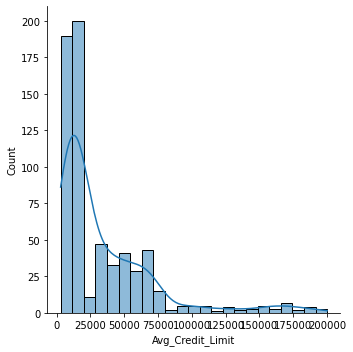

Distplot for numeric column :  Total_Credit_Cards


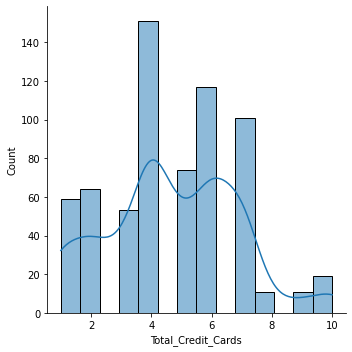

Distplot for numeric column :  Total_visits_bank


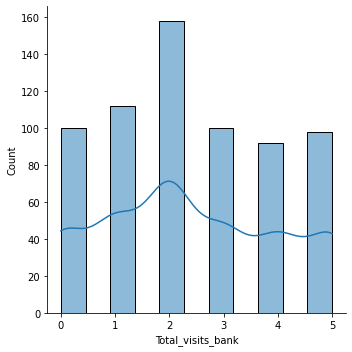

Distplot for numeric column :  Total_visits_online


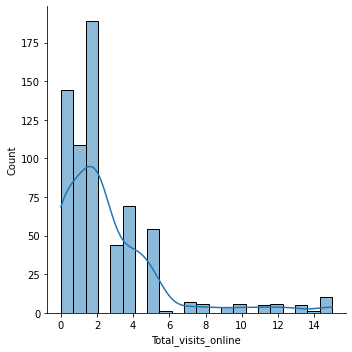

Distplot for numeric column :  Total_calls_made


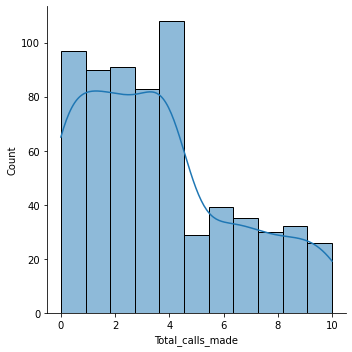

In [14]:
univariatePlots(data)

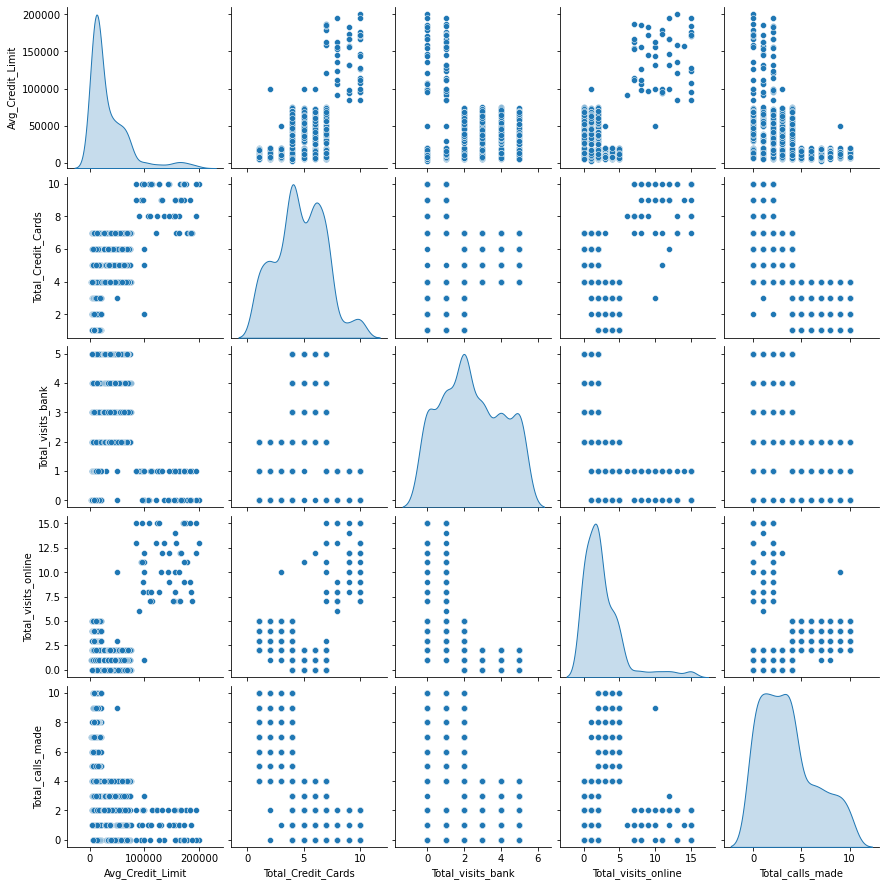

In [15]:
sns.pairplot(data, diag_kind='kde')

In [16]:
corr = data.corr()

<AxesSubplot:>

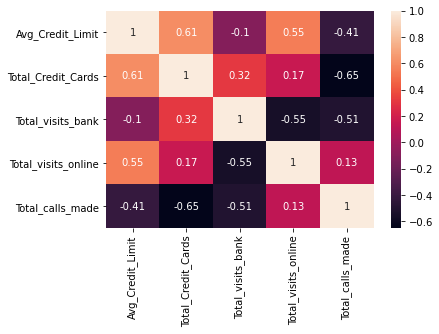

In [17]:
sns.heatmap(corr, annot=True)

In [18]:
data.drop(['Avg_Credit_Limit'], axis=1, inplace=True)

In [19]:
data.head()

Total_Credit_Cards  Total_visits_bank  Total_visits_online  \
0                   2                  1                    1   
1                   3                  0                   10   
2                   7                  1                    3   
3                   5                  1                    1   
4                   6                  0                   12   

   Total_calls_made  
0                 0  
1                 9  
2                 4  
3                 4  
4                 3

In [20]:
from sklearn.preprocessing import StandardScaler

std_scaller = StandardScaler()
scaller = std_scaller.fit(data)

In [21]:
scaller.mean_

array([4.70606061, 2.4030303 , 2.60606061, 3.58333333])

In [22]:
scalled = scaller.transform(data)
data_s = pd.DataFrame(scalled, columns=data.columns)
data_s

Total_Credit_Cards  Total_visits_bank  Total_visits_online  \
0             -1.249225          -0.860451            -0.547490   
1             -0.787585          -1.473731             2.520519   
2              1.058973          -0.860451             0.134290   
3              0.135694          -0.860451            -0.547490   
4              0.597334          -1.473731             3.202298   
..                  ...                ...                  ...   
655            2.443892          -0.860451             2.520519   
656            2.443892          -0.860451             3.543188   
657            1.520613          -0.860451             2.179629   
658            2.443892          -0.860451             4.224968   
659            1.982253          -1.473731             3.202298   

     Total_calls_made  
0           -1.251537  
1            1.891859  
2            0.145528  
3            0.145528  
4           -0.203739  
..                ...  
655         -1.251537  
656         -0.553005  
657         -0.902271  
658         -1.251537  
659         -0.553005  

[660 rows x 4 columns]

In [23]:
data_s.shape

(660, 4)

In [24]:
#Finding optimal no. of clusters
from scipy.spatial.distance import cdist
clusters=range(1, 15)
meanDistortions=[]

for k in clusters:
    kmean_model = KMeans(n_clusters=k)
    kmean_model.fit(data_s)
    kmean_pred = kmean_model.predict(data_s)
    meanDistortions.append(sum(np.min(cdist(data_s, kmean_model.cluster_centers_, 'euclidean'), axis=1))/data_s.shape[0])

Text(0.5, 1.0, 'Selecting k with the Elbow Method')

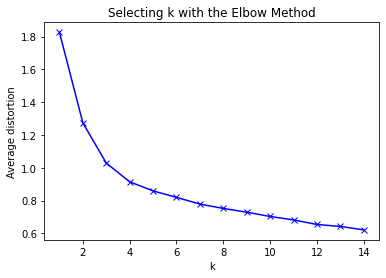

In [25]:
plt.plot(clusters, meanDistortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Average distortion')
plt.title('Selecting k with the Elbow Method')

In [26]:
# Preparing kmean clistering with k = 4

kmeans = KMeans(n_clusters=4, n_init=15, random_state=7)
kmeans.fit(data_s)
kmeans_pred = kmeans.predict(data_s)

In [27]:
kmeans_pred

array([3, 0, 3, 3, 2, 0, 2, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 3, 3, 1, 3, 1, 3, 1, 1, 1, 1, 3, 3, 3, 1,
       3, 1, 3, 3, 1, 3, 1, 1, 3, 3, 1, 3, 3, 1, 3, 1, 3, 1, 1, 3, 1, 3,
       1, 1, 1, 1, 1, 1, 1, 3, 3, 1, 1, 3, 1, 1, 1, 1, 1, 3, 3, 3, 3, 1,
       1, 3, 3, 1, 3, 3, 3, 3, 1, 1, 1, 1, 1, 1, 1,

In [28]:
centroids = kmeans.cluster_centers_
centroids

array([[-1.070864  , -0.90505282,  0.33262581,  1.17110029],
       [ 0.35679514,  1.29571325, -0.54390138, -0.5750638 ],
       [ 1.86222621, -1.10576269,  2.82731942, -0.87432983],
       [ 0.37343847,  0.04107119, -0.55601194, -0.52331725]])

In [29]:
#Clculate the centroids for the columns to profile
centroid_df = pd.DataFrame(centroids, columns = list(data) )
centroid_df

Total_Credit_Cards  Total_visits_bank  Total_visits_online  \
0           -1.070864          -0.905053             0.332626   
1            0.356795           1.295713            -0.543901   
2            1.862226          -1.105763             2.827319   
3            0.373438           0.041071            -0.556012   

   Total_calls_made  
0          1.171100  
1         -0.575064  
2         -0.874330  
3         -0.523317

In [30]:
kmeans_label = pd.DataFrame(kmeans_pred, columns= list(['labels']))
kmeans_label['labels'] = kmeans_label['labels'].astype('category')
kmeans_label

labels
0        3
1        0
2        3
3        3
4        2
..     ...
655      2
656      2
657      2
658      2
659      2

[660 rows x 1 columns]

In [31]:
# Joining the label dataframe with the data frame.
data_labeled = data.join(kmeans_label)
data_labeled

Total_Credit_Cards  Total_visits_bank  Total_visits_online  \
0                     2                  1                    1   
1                     3                  0                   10   
2                     7                  1                    3   
3                     5                  1                    1   
4                     6                  0                   12   
..                  ...                ...                  ...   
655                  10                  1                   10   
656                  10                  1                   13   
657                   8                  1                    9   
658                  10                  1                   15   
659                   9                  0                   12   

     Total_calls_made labels  
0                   0      3  
1                   9      0  
2                   4      3  
3                   4      3  
4                   3      2  
..                ...    ...  
655                 0      2  
656                 2      2  
657                 1      2  
658                 0      2  
659                 2      2  

[660 rows x 5 columns]

In [32]:
data_labeled['labels'].value_counts()

0    220
3    200
1    190
2     50
Name: labels, dtype: int64

In [33]:
# Let us try with K = 3 (to demonstrate the 3d plot using mplot3d)
from mpl_toolkits.mplot3d import Axes3D

array([[<AxesSubplot:title={'center':'Total_Credit_Cards'}, xlabel='[labels]'>,
        <AxesSubplot:title={'center':'Total_calls_made'}, xlabel='[labels]'>,
        <AxesSubplot:title={'center':'Total_visits_bank'}, xlabel='[labels]'>,
        <AxesSubplot:title={'center':'Total_visits_online'}, xlabel='[labels]'>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>]],
      dtype=object)

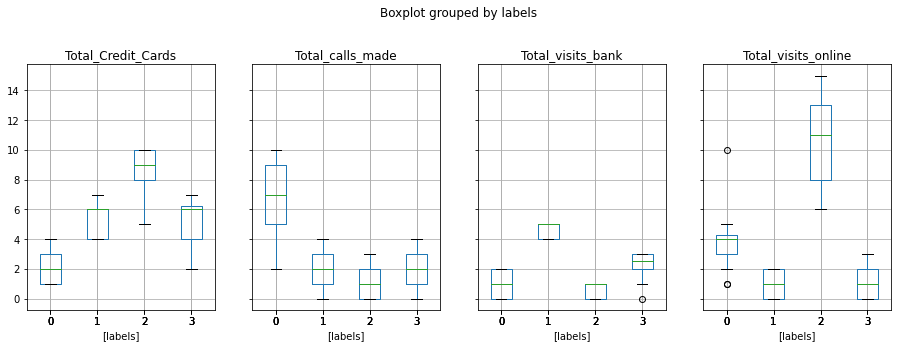

In [34]:
data_labeled.boxplot(by = 'labels',  layout=(2,4), figsize=(15, 10))

In [35]:
#hierarchical clustering - ward linkage

from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score

ward_model = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='ward')
ward_model.fit(data_s)
ward_label = pd.DataFrame(ward_model.labels_, columns=list(['label_ward']))
ward_label['label_ward'] = ward_label['label_ward'].astype('category')
data_labelled_h = data.join(ward_label)

silhouette_score(data_s, ward_model.labels_)


0.3729699784919786

In [36]:
data_labelled_h.head()

Total_Credit_Cards  Total_visits_bank  Total_visits_online  \
0                   2                  1                    1   
1                   3                  0                   10   
2                   7                  1                    3   
3                   5                  1                    1   
4                   6                  0                   12   

   Total_calls_made label_ward  
0                 0          0  
1                 9          0  
2                 4          1  
3                 4          0  
4                 3          2

In [37]:
data_labelled_h['label_ward'].value_counts()

0    225
1    211
3    174
2     50
Name: label_ward, dtype: int64

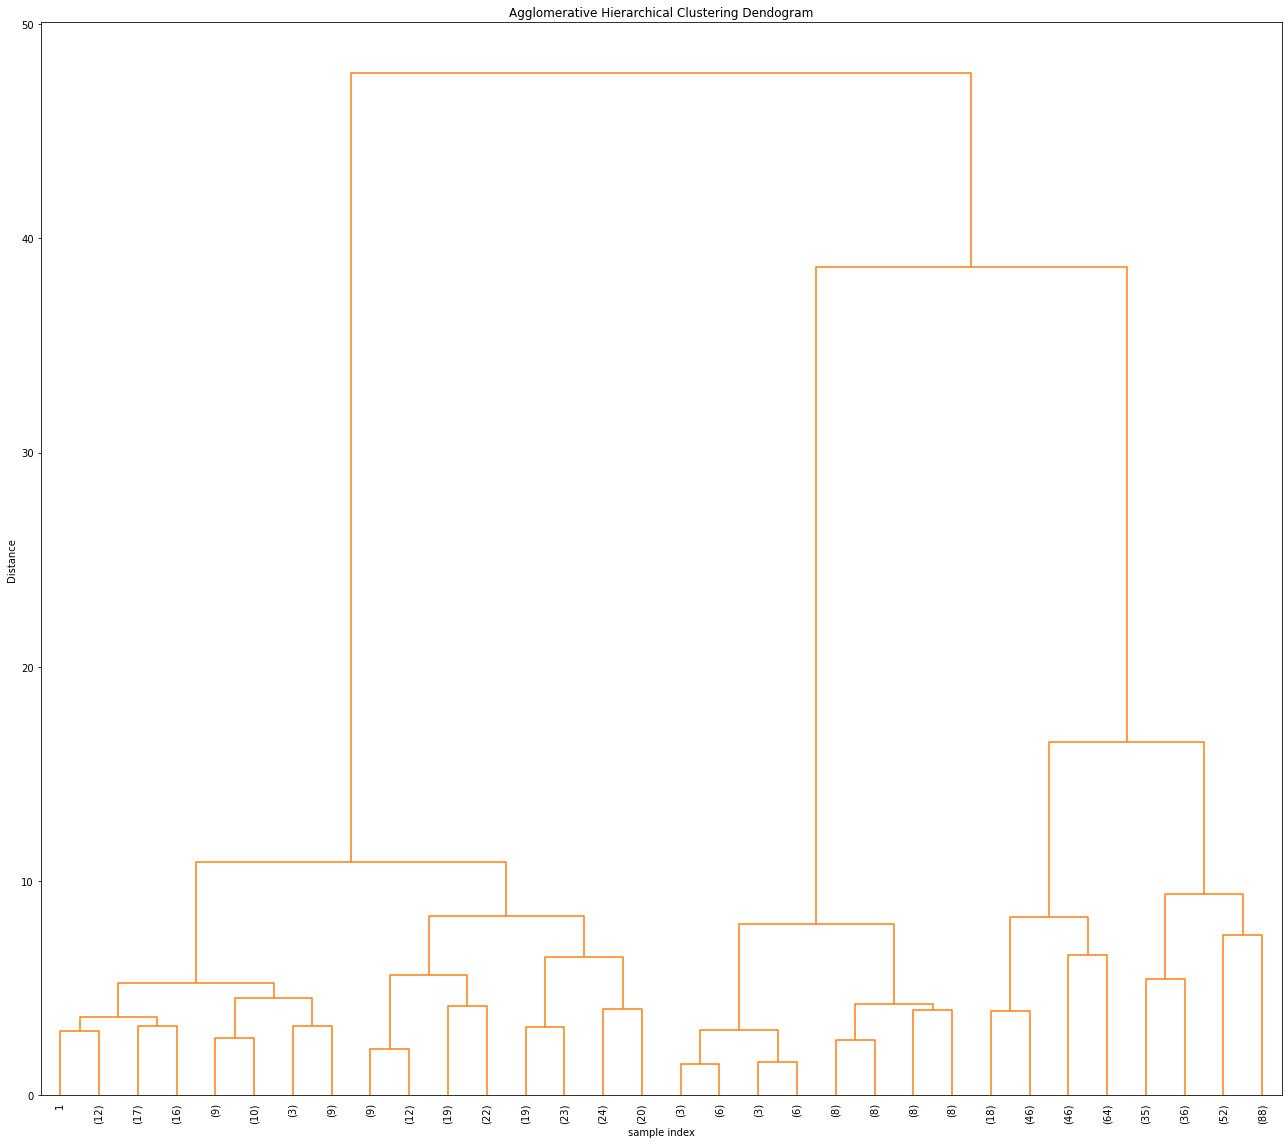

In [38]:
# dendogram with 'ward linkage'

from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.spatial.distance import pdist
import matplotlib.pyplot as plt

plt.figure(figsize=(18, 16))
plt.title('Agglomerative Hierarchical Clustering Dendogram')
plt.xlabel('sample index')
plt.ylabel('Distance')
dendrogram(linkage(data_s, 'ward'), leaf_rotation=90.0, p=4,
           color_threshold=52, leaf_font_size=10, truncate_mode='level')
plt.tight_layout()

array([[<AxesSubplot:title={'center':'Total_Credit_Cards'}, xlabel='[label_ward]'>,
        <AxesSubplot:title={'center':'Total_calls_made'}, xlabel='[label_ward]'>,
        <AxesSubplot:title={'center':'Total_visits_bank'}, xlabel='[label_ward]'>,
        <AxesSubplot:title={'center':'Total_visits_online'}, xlabel='[label_ward]'>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>]],
      dtype=object)

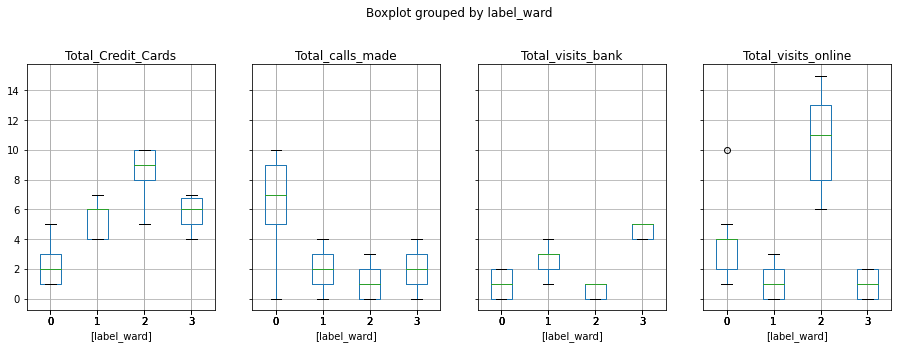

In [39]:
data_labelled_h.boxplot(by = 'label_ward',  layout=(2,4), figsize=(15, 10))

In [40]:
#hierarchical clustering - single linkage

from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score

single_model = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='single')
single_model.fit(data_s)
single_label = pd.DataFrame(single_model.labels_, columns=list(['label_single']))
single_label['label_single'] = single_label['label_single'].astype('category')
data_labelled_single = data.join(single_label)

silhouette_score(data_s, single_model.labels_)

0.10389147178590387

In [41]:
data_labelled_single

Total_Credit_Cards  Total_visits_bank  Total_visits_online  \
0                     2                  1                    1   
1                     3                  0                   10   
2                     7                  1                    3   
3                     5                  1                    1   
4                     6                  0                   12   
..                  ...                ...                  ...   
655                  10                  1                   10   
656                  10                  1                   13   
657                   8                  1                    9   
658                  10                  1                   15   
659                   9                  0                   12   

     Total_calls_made label_single  
0                   0            3  
1                   9            1  
2                   4            0  
3                   4            0  
4                   3            2  
..                ...          ...  
655                 0            2  
656                 2            2  
657                 1            2  
658                 0            2  
659                 2            2  

[660 rows x 5 columns]

In [42]:
data_labelled_single['label_single'].value_counts()

0    608
2     50
3      1
1      1
Name: label_single, dtype: int64

array([[<AxesSubplot:title={'center':'Total_Credit_Cards'}, xlabel='[label_single]'>,
        <AxesSubplot:title={'center':'Total_calls_made'}, xlabel='[label_single]'>,
        <AxesSubplot:title={'center':'Total_visits_bank'}, xlabel='[label_single]'>,
        <AxesSubplot:title={'center':'Total_visits_online'}, xlabel='[label_single]'>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>]],
      dtype=object)

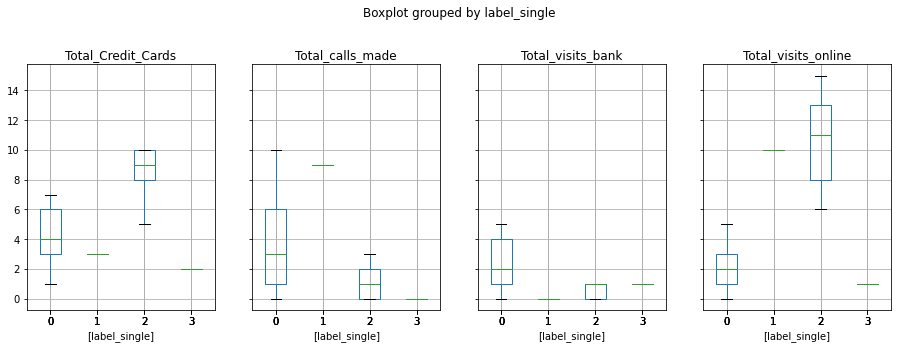

In [43]:
data_labelled_single.boxplot(by = 'label_single',  layout=(2,4), figsize=(15, 10))

In [46]:
#hierarchical clustering - complete linkage

from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score

complete_model = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='complete')
complete_model.fit(data_s)
complete_label = pd.DataFrame(complete_model.labels_, columns=list(['label_complete']))
complete_label['label_complete'] = complete_label['label_complete'].astype('category')
data_labelled_complete = data.join(complete_label)

silhouette_score(data_s, complete_model.labels_)

0.35410330488625136

In [47]:
data_labelled_complete

Total_Credit_Cards  Total_visits_bank  Total_visits_online  \
0                     2                  1                    1   
1                     3                  0                   10   
2                     7                  1                    3   
3                     5                  1                    1   
4                     6                  0                   12   
..                  ...                ...                  ...   
655                  10                  1                   10   
656                  10                  1                   13   
657                   8                  1                    9   
658                  10                  1                   15   
659                   9                  0                   12   

     Total_calls_made label_complete  
0                   0              3  
1                   9              0  
2                   4              2  
3                   4              3  
4                   3              1  
..                ...            ...  
655                 0              1  
656                 2              1  
657                 1              1  
658                 0              1  
659                 2              1  

[660 rows x 5 columns]

In [48]:
data_labelled_complete['label_complete'].value_counts()

2    385
0    213
1     50
3     12
Name: label_complete, dtype: int64

array([[<AxesSubplot:title={'center':'Total_Credit_Cards'}, xlabel='[label_complete]'>,
        <AxesSubplot:title={'center':'Total_calls_made'}, xlabel='[label_complete]'>,
        <AxesSubplot:title={'center':'Total_visits_bank'}, xlabel='[label_complete]'>,
        <AxesSubplot:title={'center':'Total_visits_online'}, xlabel='[label_complete]'>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>]],
      dtype=object)

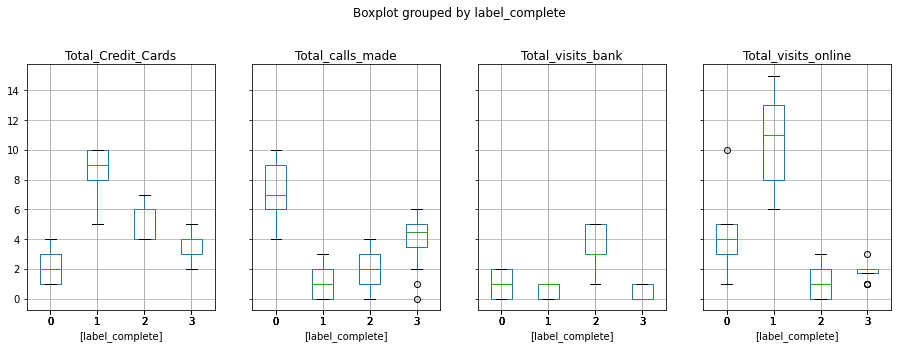

In [49]:
data_labelled_complete.boxplot(by = 'label_complete',  layout=(2,4), figsize=(15, 10))

In [52]:
#hierarchical clustering - average linkage

from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score

average_model = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='average')
average_model.fit(data_s)
average_label = pd.DataFrame(average_model.labels_, columns=list(['label_average']))
average_label['label_average'] = average_label['label_average'].astype('category')
data_labelled_average = data.join(average_label)

silhouette_score(data_s, complete_model.labels_)

0.35410330488625136

In [53]:
data_labelled_complete

Total_Credit_Cards  Total_visits_bank  Total_visits_online  \
0                     2                  1                    1   
1                     3                  0                   10   
2                     7                  1                    3   
3                     5                  1                    1   
4                     6                  0                   12   
..                  ...                ...                  ...   
655                  10                  1                   10   
656                  10                  1                   13   
657                   8                  1                    9   
658                  10                  1                   15   
659                   9                  0                   12   

     Total_calls_made label_complete  
0                   0              3  
1                   9              0  
2                   4              2  
3                   4              3  
4                   3              1  
..                ...            ...  
655                 0              1  
656                 2              1  
657                 1              1  
658                 0              1  
659                 2              1  

[660 rows x 5 columns]

In [55]:
data_labelled_average['label_average'].value_counts()

2    385
0    224
1     50
3      1
Name: label_average, dtype: int64

array([[<AxesSubplot:title={'center':'Total_Credit_Cards'}, xlabel='[label_average]'>,
        <AxesSubplot:title={'center':'Total_calls_made'}, xlabel='[label_average]'>,
        <AxesSubplot:title={'center':'Total_visits_bank'}, xlabel='[label_average]'>,
        <AxesSubplot:title={'center':'Total_visits_online'}, xlabel='[label_average]'>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>]],
      dtype=object)

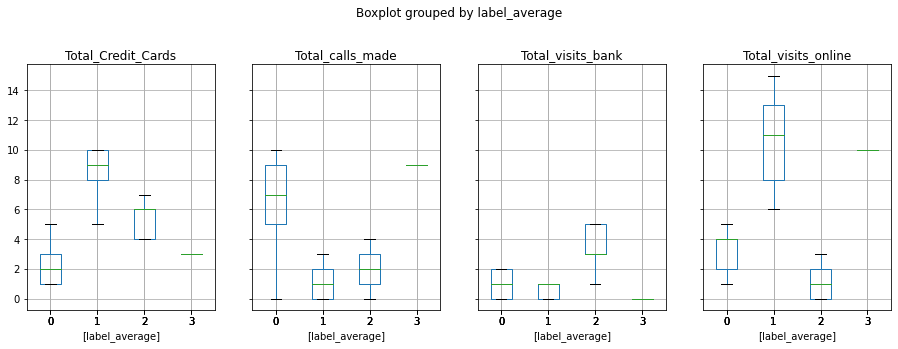

In [56]:
data_labelled_average.boxplot(by = 'label_average',  layout=(2,4), figsize=(15, 10))